**Машинное обучение Урок 8**

Взять датасет из google диска: https://drive.google.com/file/d/1MpWBFIbqu4mbiD0BBKYX6YhS-f4mN3Z_. Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.

In [5]:
!wget 'https://drive.google.com/uc?export=download&id=1MpWBFIbqu4mbiD0BBKYX6YhS-f4mN3Z_' -O data.zip

--2022-05-04 12:43:23--  https://drive.google.com/uc?export=download&id=1MpWBFIbqu4mbiD0BBKYX6YhS-f4mN3Z_
Resolving drive.google.com (drive.google.com)... 172.217.9.206, 2607:f8b0:4004:c06::64, 2607:f8b0:4004:c06::71, ...
Connecting to drive.google.com (drive.google.com)|172.217.9.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2nk0bl7nkudp88bjmucffjjdg1vg4q39/1651668150000/14904333240138417226/*/1MpWBFIbqu4mbiD0BBKYX6YhS-f4mN3Z_?e=download [following]
--2022-05-04 12:43:25--  https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2nk0bl7nkudp88bjmucffjjdg1vg4q39/1651668150000/14904333240138417226/*/1MpWBFIbqu4mbiD0BBKYX6YhS-f4mN3Z_?e=download
Resolving doc-04-c0-docs.googleusercontent.com (doc-04-c0-docs.googleusercontent.com)... 172.253.63.132, 2607:f8b0:4004:c08::84
Connecting to doc-04-c0-docs.googleusercontent.com (

In [6]:
!unzip data.zip

Archive:  data.zip
  inflating: marketing description.txt  
  inflating: marketing_campaign.csv  
  inflating: subscribers.csv         
  inflating: users.csv               


In [7]:
import pandas as pd

In [8]:
marketing_campaign = pd.read_csv('marketing_campaign.csv')
marketing_campaign

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True
3,a1003,1/1/18,House Ads,personalization,English,True
4,a1004,1/1/18,House Ads,personalization,English,True
...,...,...,...,...,...,...
10032,a11032,1/17/18,Email,control,German,True
10033,a11033,1/17/18,Email,control,German,True
10034,a11034,1/5/18,Instagram,control,German,False
10035,a11035,1/17/18,Email,control,German,True


In [9]:
marketing_campaign.variant.value_counts()

control            5091
personalization    4946
Name: variant, dtype: int64

In [10]:
marketing_campaign.converted.value_counts()

False    8946
True     1076
Name: converted, dtype: int64

In [11]:
marketing_campaign[marketing_campaign['variant'] == 'personalization'].describe()

,user_id,date_served,marketing_channel,variant,language_displayed,converted
count,4946,4945,4946,4946,4946,4946
unique,4946,31,5,1,4,2
top,a1000,1/15/18,House Ads,personalization,English,False
freq,1,434,2181,4946,4863,4241


In [12]:
marketing_campaign[marketing_campaign['variant'] == 'control'].describe()

,user_id,date_served,marketing_channel,variant,language_displayed,converted
count,5091,5076,5076,5091,5091,5076
unique,5091,31,5,1,4,2
top,a1055,1/15/18,House Ads,control,English,False
freq,1,355,2552,5091,4930,4705


In [13]:
import numpy as np

In [14]:
z_crit_value = 1.96 # соответствует доверительному интервалу в 95%
k1 = marketing_campaign[marketing_campaign['variant']=='personalization']['converted'].sum()
n1 = marketing_campaign[marketing_campaign['variant']=='personalization'].shape[0]
k2 = marketing_campaign[marketing_campaign['variant']=='control']['converted'].sum()
n2 = marketing_campaign[marketing_campaign['variant']=='control'].shape[0]

k1, n1, k2, n2

(705, 4946, 371, 5091)

In [15]:
grouped = marketing_campaign.pivot_table(values='converted', index='variant', aggfunc=['sum', 'count'])
grouped

,sum,count
,converted,converted
variant,,
control,371,5076
personalization,705,4946


In [16]:
p1, p2 = k1/n1, k2/n2
p1, p2

(0.14253942579862516, 0.07287369868395208)

In [17]:
P = (p1*n1 + p2*n2) / (n1 + n2)
z = (p1 - p2) / (P * (1 - P) * (1/n1 + 1/n2))**(1/2)
z

11.278864170859038

In [18]:
if abs(z) > z_crit_value:
    print("We may reject the null hypothesis!")
else:
    print("We have failed to reject the null hypothesis")

We may reject the null hypothesis!


In [19]:
from statsmodels.stats import proportion

z_score, z_pvalue = proportion.proportions_ztest(np.array([k1, k2]), 
                                                 np.array([n1, n2]))

print(f'Results are z_score={z_score:.3f} pvalue={z_pvalue:.3f}')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Results are z_score=11.279 pvalue=0.000


In [20]:
grouped

,sum,count
,converted,converted
variant,,
control,371,5076
personalization,705,4946


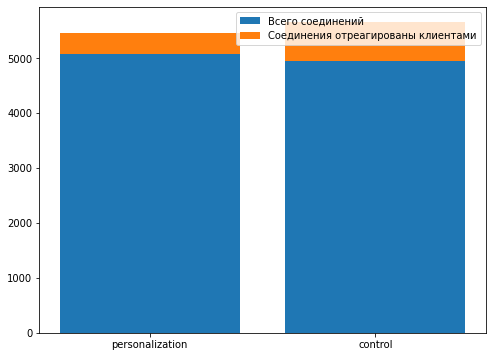

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar([1, 2], grouped['count']['converted'], label='Всего соединений')
plt.bar([1, 2], grouped['sum']['converted'], bottom=grouped['count']['converted'], label='Соединения отреагированы клиентами')
plt.xticks([1, 2], ['personalization', 'control'])
plt.legend();

In [22]:
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]), 
                                                        np.array([n1, n2]))

print(f'Results are chisq={chisq:.3f} pvalue={pvalue:.3f}')

Results are chisq=127.213 pvalue=0.000
